<a href="https://colab.research.google.com/github/VedantMalgundkar/Simple-linear-regression-with-custom-gradient-descent-/blob/main/Gradient_descent_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !pip install --upgrade plotly

In [2]:
import plotly.express as px
import plotly.graph_objects as go
from IPython import display
import os

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
!apt install imagemagick

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
imagemagick is already the newest version (8:6.9.11.60+dfsg-1.3ubuntu0.22.04.3).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.


In [5]:
!rm -rf images # To remove directory
!rm -rf test.gif # To remove gif
!rm -rf images2
!rm -rf GD_visual.gif

In [6]:
!mkdir images

In [7]:
np.random.seed(0)
x = np.random.randn(1000,1).reshape(1,-1)[0]
y = 3 * x + 5 + np.random.normal(10,1.5,1000)

In [8]:
m=0.0
c=0.0
learning_rate = 0.01

mlst = []
clst = []
loss_lst = []

for i in range(1000):
  dldm = 0.0
  dldc = 0.0
  n = x.shape[0]
  dldm = np.sum(-x * (y - (m * x + c)))
  dldc = np.sum(-1 * (y - (m * x + c)))

  m = m - learning_rate * (1 / n) * dldm
  c = c - learning_rate * (1 / n) * dldc

  mlst.append(m)
  clst.append(c)

  yhat = m * x + c
  loss = np.divide(np.sum((y - yhat) ** 2), (2 * x.shape[0]))
  loss_lst.append(loss)




  plt.title('Updating slope and y_intercept using gradient descent to find best fit line')
  plt.xlim(x.min()-(np.mean(abs(np.diff(x)))/2), x.max()+(np.mean(abs(np.diff(x))/2)))
  plt.ylim(y.min()-(np.mean(abs(np.diff(y)))/2), y.max()+(np.mean(abs(np.diff(y)))/2))
  fig = plt.gcf()
  fig.set_size_inches(18-3, 10-3)

  plt.scatter(x, y, color='black')
  plt.xlabel('X')
  plt.ylabel('Y')


  if i in range(1, 1000, 30):
    # plt.plot(x,df3.iloc[i,:])
    plt.plot(x,yhat)
    fig.text(0.15, 0.82,
          f'Epoch                                 : {i}',
          style = 'italic',
          fontsize = 16,
          color = "green")
    fig.text(0.15, 0.77,
          f'Updated slope                   : {m:.3f}',
          style = 'italic',
          fontsize = 16,
          color = "green")
    fig.text(0.15, 0.72,
          f'Updated y-intercept          : {c:.3f}',
          style = 'italic',
          fontsize = 16,
          color = "green")
    plt.savefig(f'images/{i:003}',dpi =100 , facecolor = 'white')
    plt.close()
plt.close()

In [9]:
# animation
!convert -delay 10 images/* bestfit.gif # large the number "10" slower the gif.

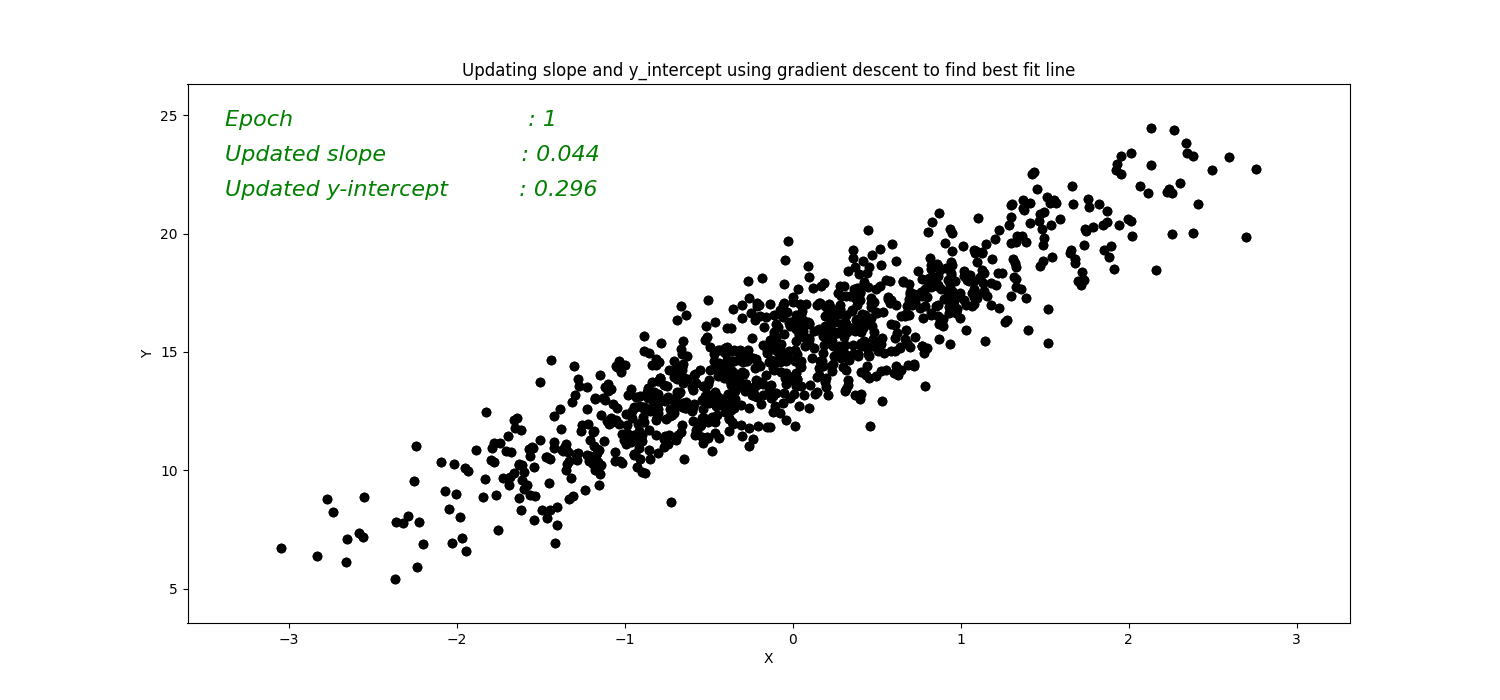

In [10]:
from IPython.display import Image
Image('/content/bestfit.gif')

In [11]:
m_lst = np.array(mlst).reshape(-1,1)
c_lst = np.array(clst).reshape(-1,1)
loss_lst = np.round(np.array(loss_lst).reshape(-1,1),decimals = 2)

df_data = np.concatenate([m_lst,c_lst,loss_lst],1)

df = pd.DataFrame(df_data,columns = ['Slope','y-intercept','Loss'])
df['Epoch'] = df.index
df.head()

Slope  y-intercept    Loss  Epoch
0  0.022039     0.148847  113.83      0
1  0.043930     0.296215  111.62      1
2  0.065675     0.442119  109.45      2
3  0.087273     0.586574  107.33      3
4  0.108725     0.729594  105.25      4

In [12]:
fig = px.scatter_3d(df,hover_data=['Epoch']
                    ,x=df.columns[0],y=df.columns[1],z=df.columns[2]
                    ,size_max=30
                    ,size = 'Loss')

fig.update_layout(autosize=False,
                  title_text='As Epoch increases loss decreases.',
                  width=900,height=800)


fig.show()

In [13]:
# fig.write_html("/content/GD.html")

In [14]:
def z_function(m,c):

    loss_arr = np.array([])

    if type(m) == int or type(m) == float:
        loss = np.divide(np.sum((y - (m * x + c)) ** 2), 2 * x.shape[0])
        return loss

    else:
        for rows in range(m.shape[0]):
            for ele in range(len(m[rows])):
                loss = np.divide(np.sum((y - (m[rows][ele]*x + c[rows][ele]))** 2), 2 * x.shape[0])
                loss_arr = np.append(loss_arr, loss)

        return loss_arr.reshape(-1,len(m))


In [15]:
X = np.linspace(-50,50,100)
Y = np.linspace(-50,50,100)


X_mesh,Y_mesh = np.meshgrid(X,Y)

Z = z_function(X_mesh,Y_mesh)

In [16]:
!mkdir images2 # create directory

In [17]:
# !rm -rf images2 # To remove directory
# !rm -rf GD_visual.gif # To remove gif

In [18]:
ax = plt.subplot(projection="3d",computed_zorder = False)

Y = Y[::-1]
try:
  dir = os.listdir('/content/images2')
except:
  print('Make image2 named directory.')
if len(dir) == 0:
  for i in range(1,int(len(X)/2)):
      ax.set_title('Gradient descent visualization')
      ax.set_xlabel('Slope')
      ax.set_ylabel('Y-intercept')
      ax.set_zlabel('MSE Loss')
      fig = plt.gcf()
      fig.set_size_inches(18, 10)
      ax.view_init(31, 30) # camera angle

      ax.plot_surface(X_mesh, Y_mesh, Z, cmap="viridis") # 3d surface plot

      Z_axis=z_function(float(X[i]), float(Y[i]))
      ax.scatter(X[i],Y[i],Z_axis,color = "magenta",zorder=1) # Gradient Descent visualization

      if i % 2 == 0:
        plt.savefig(f'images2/{i:003}',dpi =100 , facecolor = 'white')

      print(f"{i/int(len(X)/2)*100:.0f} %")
  print("100 %")
  plt.close()
else :
  print(f"'/content/images2' directory should be empty before running this cell.")

2 %
4 %
6 %
8 %
10 %
12 %
14 %
16 %
18 %
20 %
22 %
24 %
26 %
28 %
30 %
32 %
34 %
36 %
38 %
40 %
42 %
44 %
46 %
48 %
50 %
52 %
54 %
56 %
58 %
60 %
62 %
64 %
66 %
68 %
70 %
72 %
74 %
76 %
78 %
80 %
82 %
84 %
86 %
88 %
90 %
92 %
94 %
96 %
98 %
100 %


In [19]:
!convert -delay 15 images2/* GD_visual.gif
# if getting any error run cell 4 to install imagemagick

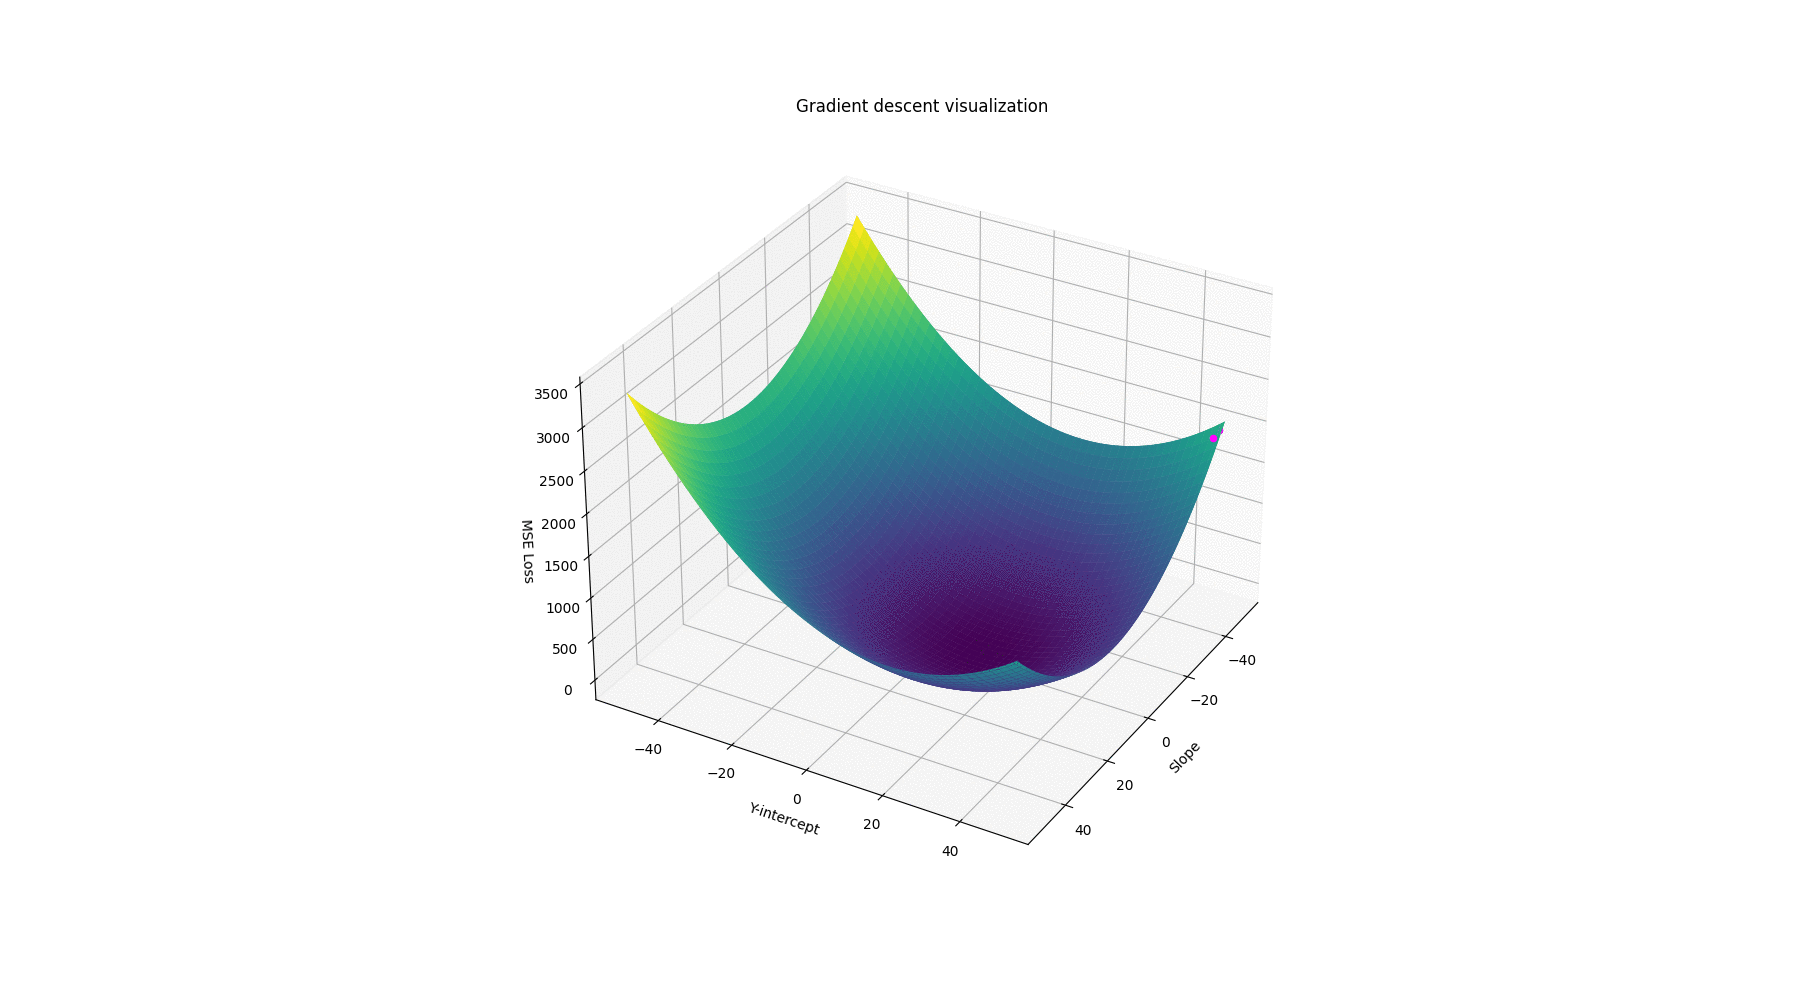

In [20]:
from IPython.display import Image,display
Image('/content/GD_visual.gif')